<a href="https://colab.research.google.com/github/AnhVietPham/Computer-Science/blob/master/Practice_ImageSegmentation_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 256, 256])
torch.Size([3, 518, 1292])


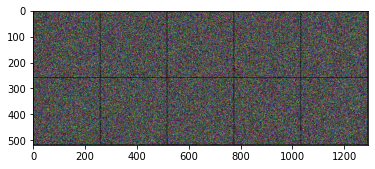

In [15]:
batch_tensor = torch.randn((10, 3, 256, 256))
print(batch_tensor.shape)
grid_img = torchvision.utils.make_grid(batch_tensor, nrow=5)
print(grid_img.shape)
plt.imshow(grid_img.permute(1, 2, 0))

In [ ]:
transforms_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
trainset = torchvision.datasets.CIFAR10(root='./data', train = True,
                                        download = True,
                                        transform = transforms_train
                                       )
data = trainset.data
print(data.shape)
print(data.mean(axis=(0,1,2))/255)
print(data.std(axis=(0,1,2))/255)

Files already downloaded and verified
(50000, 32, 32, 3)
[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


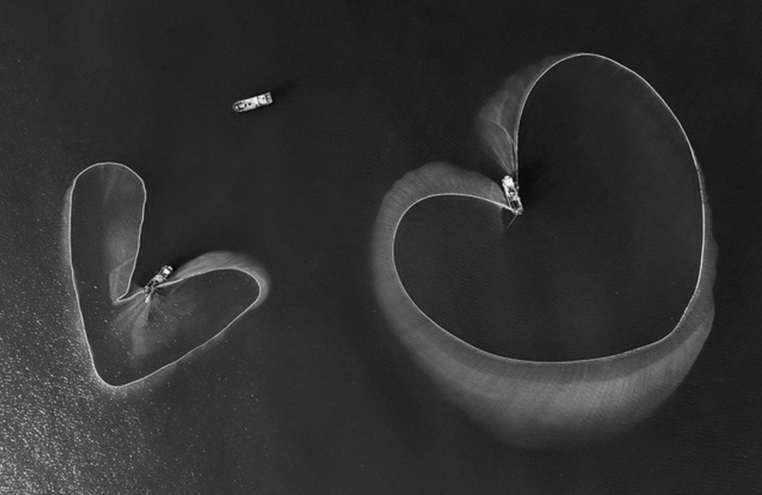

In [ ]:
img = cv2.imread('/content/anhviet2.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# **OpenCV Resize image using cv2.resize()**
https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

Original Dimensions: (149, 200, 4)
Original Height: 200
Original Weight: 149
Original channel: 4
============== Original Image ================


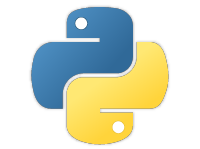

Dimension (120, 89)
Resized Dimension: (89, 120, 4)
============== Resized Image ================


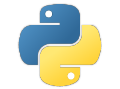

In [ ]:
image_opencv = cv2.imread('/content/python-opencv.png', cv2.IMREAD_UNCHANGED)
print(f'Original Dimensions: {image_opencv.shape}')
print(f'Original Height: {image_opencv.shape[1]}')
print(f'Original Weight: {image_opencv.shape[0]}')
print(f'Original channel: {image_opencv.shape[2]}')
print('============== Original Image ================')
cv2_imshow(image_opencv)
scale_percent = 60
width = int(image_opencv.shape[1] * scale_percent / 100)
height = int(image_opencv.shape[0] * scale_percent / 100)

dim = (width, height)

print(f'Dimension {dim}')

image_opencv_resized = cv2.resize(image_opencv, dim)
print(f'Resized Dimension: {image_opencv_resized.shape}')
print('============== Resized Image ================')

cv2_imshow(image_opencv_resized)

============== Resized Image Tôi yêu Biển Cả ================


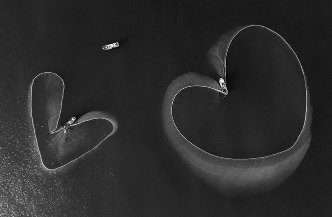

Resized Image Dimension: (217, 332)
[[ 40  38  39 ...  28  30  29]
 [ 40  38  38 ...  27  30  31]
 [ 40  39  38 ...  28  27  29]
 ...
 [127 121 155 ...  38  38  36]
 [197 103  84 ...  33  35  35]
 [ 83 124 100 ...  35  33  34]]


In [ ]:
print('============== Resized Image Tôi yêu Biển Cả ================')
img_resized = cv2.resize(img, (int(img.shape[1] /2), int(img.shape[0] / 2)))
cv2_imshow(img_resized)
print(f'Resized Image Dimension: {img_resized.shape}')
print(img_resized)

In [ ]:
print('==== Before Reshape ====')
print(img_resized)

print('==== After Reshape ====')
img_reshape = img_resized.reshape(img_resized.shape[0]*img_resized.shape[1])
print(img_reshape.shape)
print(img_reshape)

==== Before Reshape ====
[[ 40  38  39 ...  28  30  29]
 [ 40  38  38 ...  27  30  31]
 [ 40  39  38 ...  28  27  29]
 ...
 [127 121 155 ...  38  38  36]
 [197 103  84 ...  33  35  35]
 [ 83 124 100 ...  35  33  34]]
==== After Reshape ====
(72044,)
[40 38 39 ... 35 33 34]


In [ ]:
img_reshape_mean = img_reshape.mean()*2
print(img_reshape_mean)

87.58750208206096


====== Mean ======
Image Mean: 87.58750208206096


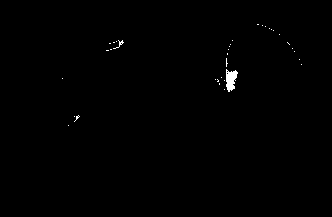

In [ ]:
print('====== Mean ======')
print(f'Image Mean: {img_reshape_mean}')
for i in range(img_reshape.shape[0]):
    if (img_reshape[i] > 20):
      img_reshape[i] = 0
    else:
      img_reshape[i] = 255
img_reshape_gray = img_reshape.reshape(img_resized.shape[0], img_resized.shape[1]) 
cv2_imshow(img_reshape_gray)